In [636]:
# import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime

In [637]:
cwd = os.getcwd()
data_file_name = "/day.csv"
dataset = pd.read_csv(cwd + data_file_name)
dataset.shape #(731, 16)

(731, 16)

In [638]:
# convert string to datetime
dataset.dteday = dataset.dteday.apply(lambda x:pd.to_datetime(x))


In [639]:
# calculate the ahead n-7 to n-2 days average number
def calcAvgShift(dfCol, period, exclude):
    try:
        summary = dfCol.rolling(period).mean()
        if period is None:
            return dfCol
        if exclude is None:
            return summary
        return dfCol.shift(len(exclude)).rolling(period, 1).mean()
    except Exception as e:
        print("error:" + str(e))

In [640]:
# dataset['cnt_lag2'] = dataset['cnt'].shift(2)
dataset['casual_lag2'] = dataset['casual'].shift(2)
dataset['regist_lag2'] = dataset['registered'].shift(2)
dataset['avg_casual_aheadWeek'] = calcAvgShift(dataset.casual, 7, [0, 1])
dataset['avg_regist_aheadWeek'] = calcAvgShift(dataset.registered, 7, [0, 1])
dataset['avg_casual_aheadMonth'] = calcAvgShift(dataset.casual, 31, [0, 1])
dataset['avg_regist_aheadMonth'] = calcAvgShift(dataset.registered, 31, [0, 1])
dataset['lastWeekday_casual'] = dataset.casual.shift(7)
dataset['lastWeekday_regist'] = dataset.registered.shift(7)


In [641]:
dataset = dataset.drop(['instant'], axis = 1)

In [642]:
dummy_season = pd.get_dummies(dataset.season, prefix="season")
dummy_weathersit = pd.get_dummies(dataset.weathersit, prefix="weathersit")

In [643]:
dataset = pd.concat([dataset, dummy_season, dummy_weathersit], axis = 1)

In [644]:
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed','casual', 'registered', 'casual_lag2', 'regist_lag2',
       'avg_casual_aheadWeek', 'avg_regist_aheadWeek',
       'avg_casual_aheadMonth', 'avg_regist_aheadMonth',
       'lastWeekday_casual', 'lastWeekday_regist']

In [645]:
train = dataset[dataset.dteday < datetime(2012, 1, 1)]
test = dataset[dataset.dteday > datetime(2011, 12, 31)]
test

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,avg_regist_aheadMonth,lastWeekday_casual,lastWeekday_regist,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3
365,2012-01-01,1,1,1,0,0,0,1,0.370000,0.375621,...,2596.129032,303.0,451.0,1,0,0,0,1,0,0
366,2012-01-02,1,1,1,1,1,0,1,0.273043,0.252304,...,2544.354839,430.0,887.0,1,0,0,0,1,0,0
367,2012-01-03,1,1,1,0,2,1,1,0.150000,0.126275,...,2481.870968,103.0,1059.0,1,0,0,0,1,0,0
368,2012-01-04,1,1,1,0,3,1,2,0.107500,0.119337,...,2418.483871,255.0,2047.0,1,0,0,0,0,1,0
369,2012-01-05,1,1,1,0,4,1,1,0.265833,0.278412,...,2393.935484,254.0,2169.0,1,0,0,0,1,0,0
370,2012-01-06,1,1,1,0,5,1,1,0.334167,0.340267,...,2375.290323,491.0,2508.0,1,0,0,0,1,0,0
371,2012-01-07,1,1,1,0,6,0,1,0.393333,0.390779,...,2360.903226,665.0,1820.0,1,0,0,0,1,0,0
372,2012-01-08,1,1,1,0,0,0,1,0.337500,0.340258,...,2403.580645,686.0,1608.0,1,0,0,0,1,0,0
373,2012-01-09,1,1,1,0,1,1,2,0.224167,0.247479,...,2493.774194,244.0,1707.0,1,0,0,0,0,1,0
374,2012-01-10,1,1,1,0,2,1,1,0.308696,0.318826,...,2482.612903,89.0,2147.0,1,0,0,0,1,0,0


In [646]:
train = train[7:]

In [647]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(train[numerical_cols])
train[numerical_cols] = scaler.transform(train[numerical_cols])
test[numerical_cols] = scaler.transform(test[numerical_cols])


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [648]:
drop_col = ['dteday', 'yr', 'mnth', 'weekday', 'season', 'weathersit', 'cnt']

In [649]:
train = train.drop(drop_col, axis = 1)
test = test.drop(drop_col, axis = 1)


In [650]:
train.columns.values

array(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'casual_lag2', 'regist_lag2',
       'avg_casual_aheadWeek', 'avg_regist_aheadWeek',
       'avg_casual_aheadMonth', 'avg_regist_aheadMonth',
       'lastWeekday_casual', 'lastWeekday_regist', 'season_1', 'season_2',
       'season_3', 'season_4', 'weathersit_1', 'weathersit_2',
       'weathersit_3'], dtype=object)

In [659]:
from sklearn import tree
drops = ['registered', 'casual', \
                      'casual_lag2', 'avg_casual_aheadWeek', \
                      'avg_casual_aheadMonth', 'lastWeekday_casual']
train_y = train['registered']
train_x = train.drop(drops, axis = 1)
test_y = test['registered']
test_x = test.drop(drops, axis = 1)

In [660]:
train_x

,holiday,workingday,temp,atemp,hum,windspeed,regist_lag2,avg_regist_aheadWeek,avg_regist_aheadMonth,lastWeekday_regist,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3
7,0,0,-1.736536,-1.844611,-0.735774,0.974136,-1.178227,-1.774615,-1.723376,-1.994302,1,0,0,0,0,1,0
8,0,0,-1.878437,-2.119944,-1.420220,2.206879,-1.326913,-1.744383,-1.693131,-1.979086,1,0,0,0,1,0,0
9,0,1,-1.811922,-1.912525,-1.092021,0.410057,-1.775831,-1.706305,-1.736690,-1.447500,1,0,0,0,1,0,0
10,0,1,-1.714767,-1.670074,0.277646,-0.900281,-1.893064,-1.690560,-1.785947,-1.233534,1,0,0,0,0,1,0
11,0,1,-1.695420,-1.855253,-0.306846,1.464183,-1.405069,-1.682366,-1.767744,-1.172672,1,0,0,0,1,0,0
12,0,1,-1.736536,-1.912555,-1.176174,1.417191,-1.462256,-1.719962,-1.758988,-1.172672,1,0,0,0,1,0,0
13,0,1,-1.758513,-1.688304,-0.722357,-0.843066,-1.541365,-1.781176,-1.759474,-1.321022,1,0,0,0,1,0,0
14,0,0,-1.372923,-1.331588,-0.985428,-0.436043,-1.321195,-1.805276,-1.739892,-1.768924,1,0,0,0,0,1,0
15,0,0,-1.381788,-1.414614,-1.086413,-0.041264,-1.322148,-1.804472,-1.723188,-1.885892,1,0,0,0,1,0,0
16,1,0,-1.678892,-1.757868,-0.724552,0.031085,-1.647160,-1.782782,-1.734290,-1.399001,1,0,0,0,0,1,0


In [652]:
clf = tree.DecisionTreeRegressor(max_depth=100)
clf = clf.fit(train_x, train_y)
dt_test_predict = clf.predict(test_x)


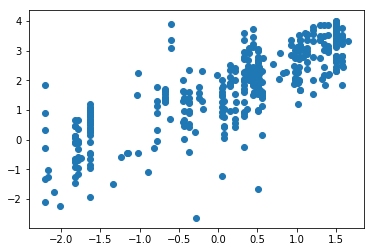

In [653]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(dt_test_predict, test_y)
plt.show()

In [654]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [655]:
regr = RandomForestRegressor(max_depth=20, random_state=0)
regr = regr.fit(train_x, train_y)
rf_test_prediction = regr.predict(test_x)

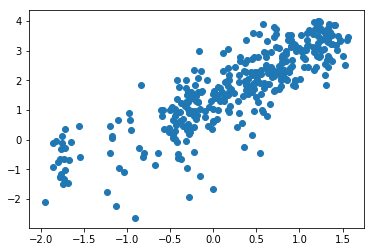

In [656]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(rf_test_prediction, test_y)
plt.show()

Feature ranking:
1. feature 7 (0.354694)
2. feature 8 (0.130683)
3. feature 10 (0.127063)
4. feature 1 (0.086496)
5. feature 3 (0.079284)
6. feature 4 (0.059502)
7. feature 16 (0.042433)
8. feature 5 (0.033951)
9. feature 2 (0.030039)
10. feature 6 (0.025759)
11. feature 9 (0.015617)
12. feature 15 (0.004990)
13. feature 14 (0.004963)
14. feature 13 (0.003287)
15. feature 0 (0.000628)
16. feature 11 (0.000321)
17. feature 12 (0.000290)


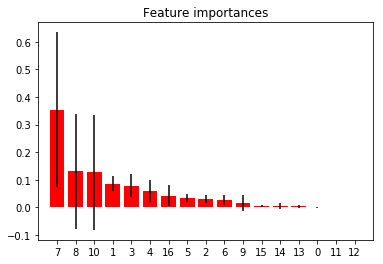

In [657]:
importances = regr.feature_importances_
importances
std = np.std([tree.feature_importances_ for tree in regr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(test_x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(test_x.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(test_x.shape[1]), indices)
plt.xlim([-1, test_x.shape[1]])
plt.show()

In [658]:
test_x.columns.values

array(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'regist_lag2', 'avg_regist_aheadWeek', 'avg_regist_aheadMonth',
       'lastWeekday_regist', 'season_1', 'season_2', 'season_3',
       'season_4', 'weathersit_1', 'weathersit_2', 'weathersit_3'],
      dtype=object)